In [1]:
# 공통 코드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager,rc
import seaborn as sns



if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()

	rc('font',family=font_name)

	

# 그래프에 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus']=False

%precision 3

import seaborn as sns
import scipy as sp
import scipy.stats

# 이항분포의 확률질량 함수

0.04165649414062496


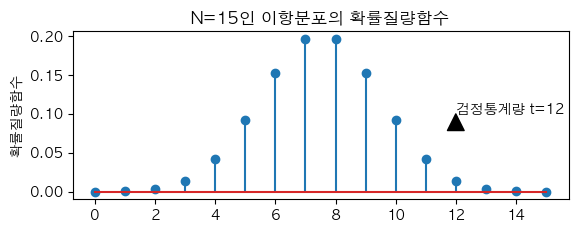

0.03515625


In [2]:
# 시행횟수

N=15
# 앞면이 나올 확률
p=0.5

# 이항분포 생성
rv=sp.stats.binom(N,p)

# 그래프 범위
xx=np.arange(N+1)
# 확률 질량 함수를 출력
plt.subplot(211)


plt.stem(xx,rv.pmf(xx)) # pmf : 확률질량함수 , cdf : 누적 밀도 함수. 
plt.ylabel("확률질량함수")
plt.title("N=15인 이항분포의 확률질량함수")
plt.annotate('검정통계량 t=12',xy=(12,0.1),xytext=(12,0.1),arrowprops={"facecolor":"black"})
print(rv.pmf(12-1))
plt.show()

# 유의 확률
x=2*(1-rv.cdf(12-1))
print(x)

# t검정

In [3]:
# Tdata.csv 파일의 성적을 읽어서 평균이 75점 이라고 할수 있는지 유의수준 5% 검정
items=pd.read_csv('./data/tdata.csv',encoding='cp949')
items

,번호,성적
0,1,77
1,2,85
2,3,63
3,4,69
4,5,82
5,6,78
6,7,73
7,8,87
8,9,65
9,10,92


In [5]:
# 성적의 평균이 75점이라고 할 때 유의 확류류 
result=sp.stats.ttest_1samp(items['성적'],popmean=75).pvalue
H0= '유의확률이 유의수준보다 높으므로 귀무가설을 채택한다.'
H1= '유의확률이 유의수준보다 낮으므로 귀무가설을 기각한다.'


if result>=0.05:
    print(H0)
    print("75점이라고 할수있다.")
else:
    print(H1)
    print("75점이라고 할수없다")

유의확률이 유의수준보다 높으므로 귀무가설을 채택한다.
75점이라고 할수있다.


### t 검정 및 2종 오류

In [15]:
# 제 2종 오류

# 첫번째 데이터 집단
N_1=10
mu_1=0
sigma_1=1

# 두번째 데이터 집단
N_2=10
mu_2=0.5
sigma_2=1

# 데이터 생성
np.random.seed(0)
x1=sp.stats.norm(mu_1,sigma_1).rvs(N_1)
x2=sp.stats.norm(mu_2,sigma_2).rvs(N_2)
# print(x1)
# print(x2)

# ax=sns.distplot(x1,kde=False,fit=sp.stats.norm,label='1번 집단')
# ax=sns.distplot(x2,kde=False,fit=sp.stats.norm,label='2번 집단')
# ax.lines[0].set_linestyle(':')
# plt.show()


print(sp.stats.ttest_ind(x1,x2,equal_var=False))
# 유의확률이 0.684
# 유의수준을 얼마로 지정하더라도 귀무가설을 기각할 수 없다. 
# # 평균이 0과 0.5 다른데도 두 집단의 평균이 같다라는 유의 확률이 0.684 
# 귀무가설이 거짓인데 참 -> 2종오류라고 한다. 
# 원인은 보통 데이터 개수의 부족

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)


### 2종 오류 제거
- 데이터의 개수를 늘려서 2종 오류를 제거 할 수 있다.

In [16]:
# 제 2종 오류

# 첫번째 데이터 집단
N_1=100
mu_1=0
sigma_1=1

# 두번째 데이터 집단
N_2=100
mu_2=0.5
sigma_2=1

# 데이터 생성
np.random.seed(0)
x1=sp.stats.norm(mu_1,sigma_1).rvs(N_1)
x2=sp.stats.norm(mu_2,sigma_2).rvs(N_2)
# print(x1)
# print(x2)

# ax=sns.distplot(x1,kde=False,fit=sp.stats.norm,label='1번 집단')
# ax=sns.distplot(x2,kde=False,fit=sp.stats.norm,label='2번 집단')
# ax.lines[0].set_linestyle(':')
# plt.show()


print(sp.stats.ttest_ind(x1,x2,equal_var=False))
# 유의확률이 0.684
# 유의수준을 얼마로 지정하더라도 귀무가설을 기각할 수 없다. 
# # 평균이 0과 0.5 다른데도 두 집단의 평균이 같다라는 유의 확률이 0.684 
# 귀무가설이 거짓인데 참 -> 2종오류라고 한다. 
# 원인은 보통 데이터 개수의 부족

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.0004063422259488094)


### 서로 다른 10명에게 수면제 1을 복용했을때 수면 증가 시간과 수면제 2를 복용했을때 수면 증가 시간을 조사한 경우 수면제 1과 수면제 2의 성능이 같다고 할 수 있는지 여부를 판단. 


In [21]:
# 서로 다른 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단. - 유의수준 5%
# p-v 가 0.05 보다 크면 귀무가설 채택 - 같다

np.random.seed(123)
x1=[10*np.random.rand() for _ in range(10)]
x2=[10*np.random.rand() for _ in range(10)]

r=sp.stats.ttest_ind(x1,x2,equal_var=True)
if r.pvalue >=0.05:
    print(H0)
    print("2개의 평균은 같다")
else:
    print(H1)
    print("2개의 평균은 다르다.")




유의확률이 유의수준보다 높으므로 귀무가설을 채택한다.
2개의 평균은 같다


In [25]:
# 동일한 집단에게 수면제 1과 2를 복용했을때 수면시간의 변화

# 서로 다른 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단. - 유의수준 5%
# p-v 가 0.05 보다 크면 귀무가설 채택 - 같다

np.random.seed(0)
x1=[10*np.random.rand() for _ in range(10)]
x2=[10*np.random.rand() for _ in range(10)]

r=sp.stats.ttest_rel(x1,x2)
print(r)
if r.pvalue >=0.05:
    print(H0)
    print("2개의 평균은 같다")
else:
    print(H1)
    print("2개의 평균은 다르다.")




TtestResult(statistic=0.6250586735613676, pvalue=0.5474511457798449, df=9)
유의확률이 유의수준보다 높으므로 귀무가설을 채택한다.
2개의 평균은 같다


### 윌콕슨의 부호 순위 검정

In [30]:
training_rel=pd.read_csv('./data/training_rel.csv')
# print(training_rel.head())

toy_df=training_rel[:6].copy()
# print(toy_df)

# 2개 데이터의 차이를 구하기
toy_df['차']=toy_df['후']-toy_df['전']


# 차의 절댓값을 가지고 순위를 구한다.
toy_df['순위']=sp.stats.rankdata(abs(toy_df['차'])).astype(int)
toy_df

# 차이가 음수일 때 와 양수일 때의 순위 합을 구하기
r_minus=np.sum((toy_df['차']<0)*toy_df['순위'])
r_plus=np.sum((toy_df['차']>0)*toy_df['순위'])
print(r_minus,r_plus)

# 2개 중 작은 값이 검정 통계량이다.. 
# 이 값과 임계값(직접 설정 한 값)과 비교해서 임계값 보다 작은 경우 귀무가설이 기각되는 단측 검정 

8 13


#### 5가지 음료를 각각 선택하도록 만들었을떄 사람들이 선호하는 음료가 있는지 여부 검정
- 41,30,51,61,71
- 유의수준 5% 카이제곱 검정 - t-test 와 반대로 해석한다.
- 유의 수준이 유의 확률보다 크다=> 귀무가설 채택 - 선호도 차이가 없다. 

In [33]:
data=[30,41,51,61,71]
# 카이제곱 검정 수행
print(sp.stats.chisquare(data))
# 유의수준 5프로 미만이기 때문에 선호도의 차이가 있다. 
# 평균을 가지고 하는 검정과 분산을 가지고 하는 검정은 결과 해석을 반대로 ㅎ나다. 

Power_divergenceResult(statistic=20.488188976377955, pvalue=0.00039991784008227194)
